<a href="https://colab.research.google.com/github/ilyandho/FPL-Optimal-Transfer/blob/main/FPL_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [21]:
%pip install sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

## Fetch and extract important attributes from FPL API

Store the data to _`player_data.csv`_


In [183]:
import requests
import json
import pandas as pd



base_url = 'https://fantasy.premierleague.com/api/'



# This functionn fetches the player details using FPL API up to a given week


def get_player_data(gw):

    # Get the general, inorder to have access to the team ids in the elements component


    general_info = requests.get(base_url + "/bootstrap-static/").json()


    # player_history will contain the data


    player_history = []


    # For each game week, the stats for all players


    for gwk in range(1, gw+1):

        r = requests.get(base_url + 'event/' + str(gwk) + '/live/').json()

        # Get the fixtures for each game week gwk.

        # It will contain 10 matches with each match containing the stats for the home and away team difficulty rating.


        fixture = requests.get(base_url + 'fixtures?event=' + str(gwk)).json()


        # For each player we will also need the match difficulty for both player's team and plyaer's opponent team.


        for player in r['elements']:


            team_h_difficulty = 0

            team_a_difficulty = 0


            # Get the player element id in the player component and compare it to the id of the element in elements component of general_info

            # Also get the player position which will later be used to filter the data by position

            player_team = None

            position = None


            for element in general_info['elements']:

                if player['id'] == element['id']:

                    player_team = element['team']

                    position = element['element_type']


            # For each match in the fixture array, we compare the player team id with the away team and home team ids in the match.

            # If they match either, then update team_h_difficulty and team_a_difficulty

            for match_ in fixture:


                if player_team == match_['team_a'] or player_team == match_['team_h']:

                    team_h_difficulty = match_['team_h_difficulty']

                    team_a_difficulty = match_['team_a_difficulty']


            # Create a temporary variable containing the gwk, team_a_difficulty, team_h_difficulty and position

            temp_data = {'id': int(player['id']), 'gw': gwk, 'team_h_difficulty': team_h_difficulty,
                         'team_a_difficulty': team_a_difficulty, 'position': position}


            # The stats element in each player component contains:

            #  - minutes, goals_scored, assists, clean_sheets, goals_conceded, own_goals, penalties_saved,

            #  - penalties_missed, yellow_cards, red_cards, saves, bonus, bps, influence,

            #  - creativity, threat, ict_index, starts, expected_goals, expected_assists,

            #  - expected_goal_involvements, expected_goals_conceded, total_points, in_dreamteam


            for key in player['stats'].keys():

                temp_data.update({key: player['stats'][key]})


            # Append the player info to the player_history array

            player_history.append(temp_data)
    return player_history



player_data = pd.DataFrame(get_player_data(35))

player_data

,id,gw,team_h_difficulty,team_a_difficulty,position,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points,in_dreamteam
0,1,1,2,5,4,0,0,0,0,0,...,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False
1,2,1,2,5,2,0,0,0,0,0,...,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False
2,3,1,2,5,3,0,0,0,0,0,...,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False
3,4,1,2,5,3,0,0,0,0,0,...,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False
4,5,1,2,5,2,4,0,0,0,0,...,0.0,0.0,0.0,0,0.00,0.00,0.00,0.02,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27089,856,35,2,4,2,0,0,0,0,0,...,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False
27090,857,35,2,4,3,0,0,0,0,0,...,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False
27091,858,35,3,3,1,0,0,0,0,0,...,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False
27092,859,35,3,3,2,0,0,0,0,0,...,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False


In [191]:
player_data.columns

Index(['id', 'gw', 'team_h_difficulty', 'team_a_difficulty', 'position',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded', 'total_points',
       'in_dreamteam'],
      dtype='object')

In [184]:
# Store data to csv
player_data.to_csv('./content/player_data.csv', encoding='utf-8-sig', )

## Fetch stored player data in csv


In [186]:
import pandas as pd
# Load the player detaills
df = pd.read_csv('./content/player_data.csv')
df.tail()

,Unnamed: 0,id,gw,team_h_difficulty,team_a_difficulty,position,minutes,goals_scored,assists,clean_sheets,...,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points,in_dreamteam
27089,27089,856,35,2,4,2,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,False
27090,27090,857,35,2,4,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,False
27091,27091,858,35,3,3,1,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,False
27092,27092,859,35,3,3,2,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,False
27093,27093,860,35,3,3,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,False


In [187]:
# Get the data statics
df.describe()

,Unnamed: 0,id,gw,team_h_difficulty,team_a_difficulty,position,minutes,goals_scored,assists,clean_sheets,...,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points
count,27094.000000,27094.000000,27094.000000,27094.000000,27094.000000,27094.000000,27094.000000,27094.000000,27094.000000,27094.000000,...,27094.000000,27094.000000,27094.000000,27094.000000,27094.000000,27094.000000,27094.000000,27094.000000,27094.000000,27094.000000
mean,13546.500000,389.835978,18.730789,2.526500,2.926441,2.576438,25.230014,0.039935,0.035801,0.063926,...,5.984875,4.068982,3.807301,1.385561,0.281760,0.039960,0.025254,0.065204,0.437206,1.049310
std,7821.508433,227.281580,10.058689,1.036172,1.218595,0.856112,38.606849,0.219789,0.204521,0.247177,...,12.529096,10.649164,10.834329,2.838932,0.461369,0.149823,0.084086,0.191833,0.807939,2.319258
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000
25%,6773.250000,194.000000,10.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13546.500000,388.000000,19.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20319.750000,581.000000,27.750000,3.000000,4.000000,3.000000,64.000000,0.000000,0.000000,0.000000,...,6.200000,1.200000,0.000000,1.700000,1.000000,0.000000,0.010000,0.010000,0.610000,1.000000
max,27093.000000,860.000000,35.000000,5.000000,5.000000,4.000000,180.000000,4.000000,4.000000,2.000000,...,148.200000,181.800000,152.000000,32.600000,2.000000,2.770000,1.470000,3.880000,7.820000,29.000000


In [188]:
# Get details about each feature
# From the data info, all features have numerical values except the 'in_dreamteam' which has a boolean value
# No observation (row) for each feature (column) is null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27094 entries, 0 to 27093
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  27094 non-null  int64  
 1   id                          27094 non-null  int64  
 2   gw                          27094 non-null  int64  
 3   team_h_difficulty           27094 non-null  int64  
 4   team_a_difficulty           27094 non-null  int64  
 5   position                    27094 non-null  int64  
 6   minutes                     27094 non-null  int64  
 7   goals_scored                27094 non-null  int64  
 8   assists                     27094 non-null  int64  
 9   clean_sheets                27094 non-null  int64  
 10  goals_conceded              27094 non-null  int64  
 11  own_goals                   27094 non-null  int64  
 12  penalties_saved             27094 non-null  int64  
 13  penalties_missed            270

In [198]:
# Separate next gw's data
next_gw_data = df.loc[df['gw'] == 35]

# Drop this data from the rest of data
df = df.drop(df[df['gw'] == 35].index)

In [199]:
# Of the features, we want to use features that are available at the time the model is running.
# This makes sure that the model only depends on games stats that are available before the match starts.
# These will store in the 'attributes' variable and we will subsquently be using these for the rest of the work.
attributes = ['id', 'team_h_difficulty', 'team_a_difficulty', 'position',
              'threat', 'ict_index', 'expected_goals', 'expected_assists',
              'expected_goal_involvements', 'expected_goals_conceded', 'total_points']
players_data = df[attributes]
players_data

,id,team_h_difficulty,team_a_difficulty,position,threat,ict_index,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points
0,1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.00,0
1,2,2,5,2,0.0,0.0,0.0,0.0,0.0,0.00,0
2,3,2,5,3,0.0,0.0,0.0,0.0,0.0,0.00,0
3,4,2,5,3,0.0,0.0,0.0,0.0,0.0,0.00,0
4,5,2,5,2,0.0,0.0,0.0,0.0,0.0,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...
26230,853,2,2,3,0.0,0.0,0.0,0.0,0.0,0.00,0
26231,854,2,4,2,0.0,0.0,0.0,0.0,0.0,0.00,0
26232,855,2,2,1,0.0,0.0,0.0,0.0,0.0,0.00,0
26233,856,2,4,2,0.0,0.0,0.0,0.0,0.0,0.00,0


In [201]:
# Of the features, we want to use features that are available at the time the model is running.
# This makes sure that the model only depends on games stats that are available before the match starts.
# These will store in the 'attributes' variable and we will subsquently be using these for the rest of the work.
attributes = ['id', 'team_h_difficulty', 'team_a_difficulty', 'position',
              'threat', 'ict_index', 'expected_goals', 'expected_assists',
              'expected_goal_involvements', 'expected_goals_conceded', 'total_points']
players_data_next = next_gw_data[attributes]
players_data_next

,id,team_h_difficulty,team_a_difficulty,position,threat,ict_index,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points
26235,1,5,4,4,0.0,0.0,0.0,0.00,0.00,0.00,0
26236,2,5,4,2,0.0,0.0,0.0,0.00,0.00,0.00,0
26237,3,5,4,3,0.0,0.0,0.0,0.00,0.00,0.00,0
26238,4,5,4,3,0.0,0.0,0.0,0.00,0.00,0.00,0
26239,5,5,4,2,0.0,1.5,0.0,0.03,0.03,2.37,1
...,...,...,...,...,...,...,...,...,...,...,...
27089,856,2,4,2,0.0,0.0,0.0,0.00,0.00,0.00,0
27090,857,2,4,3,0.0,0.0,0.0,0.00,0.00,0.00,0
27091,858,3,3,1,0.0,0.0,0.0,0.00,0.00,0.00,0
27092,859,3,3,2,0.0,0.0,0.0,0.00,0.00,0.00,0


In [204]:
# Group the players by position
# Here we will train models for each position i.e each position will have its own model for predicting the data
goalkeepers = players_data.loc[players_data['position'] == 1]
defenders = players_data.loc[players_data['position'] == 2]
midfielders = players_data.loc[players_data['position'] == 3]
forwards = players_data.loc[players_data['position'] == 4]

In [203]:
from sklearn.model_selection import train_test_split

# define a function that splits and returns features_train, features_test, target_train, target_test


def split_position_data(data):
    # Store the 'total_points' target in the 'player_target' variable
    # and the rest in the player_features variable
    player_target = data['total_points']
    player_features = data.drop("total_points", axis=1)

    # The train_test_split function splits the set into train and test sets while maintain the same data distribution over both sets.
    # It takes the feature and target sets and reutrns the respective train and test sets
    features_train, features_test, target_train, target_test = train_test_split(
        player_features, player_target, test_size=0.2)

    return {'feature_train': features_train, 'features_test': features_test, 'target_train': target_train, 'target_test': target_test}

In [31]:
# Split positions into the training and the test sets
goalkeepers_splits = split_position_data(goalkeepers)
defenders_splits = split_position_data(defenders)
midfielders_splits = split_position_data(midfielders)
forwards_splits = split_position_data(forwards)

## Using ML Models to Predict Points in Fantasy Premier League

For this project we are going to compare to Linear Regression, Decision Trees and Random Forests and find out how they all perform.


#### Helper functions


In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# For the linear model


def Linear_regression(features_train, features_test, target_train, target_test):
    # Before using our data, we need to do feature scaling and we opt for the 'standardization' method of scaling.
    # The 'standardization' is avaliable thorugh the StandardScaler() method
    # Transformers help in batching tasks in a pipepline. In this case, the data is scaled and then a linear regression model is fitted on the scaled data.
    # We use a transformer that takes the regression model and the transformation method
    # The TransformedTargetRegressor does the transformation and when we do the prediction, it automatically does the inverse transformation (scaling) and returns the values
    model = TransformedTargetRegressor(
        LinearRegression(), transformer=StandardScaler())

    # fit the transofrmer on the train data
    model.fit(features_train, target_train)

    # With the model fitted, we can predict the total_points given the feature_train and feature_test set
    pred_train = model.predict(features_train)
    pred_test = model.predict(features_test)

    # Evaluate the performance of the model on both sets using the root mean square error
    train_MSE = mean_squared_error(target_train, pred_train)
    test_MSE = mean_squared_error(target_test, pred_test)

    # Get the score of the model or the coeeficient of determination i.e how much of the target value can be explained by the model.
    # In this case, 0.6 implies that 60% of the variations in the target value can be explained by the model and 40% is not explainable
    R2_train = model.score(features_train, target_train)
    R2_test = model.score(features_test, target_test)

    # If the test error significantly differs from the train error, then there is either overfitting or underfitting

    print('Training set MSE: {}'.format(train_MSE))
    print('Test set MSE: {}'.format(test_MSE))

    print('Training set R2: {}'.format(R2_train))
    print('Test set R2: {}'.format(R2_test))

    # Carry out cross validation of the model.
    # The evaluation method is the root mean square error
    # The method expects a utility function (greater is better) and so the scoring function is the opposite of the the RMSE. Hence the -ve
    tree_rmses = -cross_val_score(model, features_train, target_train,
                                  scoring="neg_root_mean_squared_error", cv=10)

    print(pd.Series(tree_rmses).describe())

    return {'train_MSE': train_MSE, 'test_MSE': test_MSE, 'R2_train': R2_train, 'R2_test': R2_test}


# Decision Tree Model
def DecionTreeRegression(features_train, features_test, target_train, target_test):
    # The DecisionTreeRegressor is passed as the model to the TransformedTreeRegressor together with the StandardScaler
    model = TransformedTargetRegressor(
        DecisionTreeRegressor(), transformer=StandardScaler())
    model.fit(features_train, target_train)

    pred_train = model.predict(features_train)
    pred_test = model.predict(features_test)

    train_MSE = mean_squared_error(target_train, pred_train)
    test_MSE = mean_squared_error(target_test, pred_test)

    R2_train = model.score(features_train, target_train)
    R2_test = model.score(features_test, target_test)

    print('Training set MSE: {}'.format(train_MSE))
    print('Test set MSE: {}'.format(test_MSE))
    print('Training set R2: {}'.format(R2_train))
    print('Test set R2: {}'.format(R2_test))

    from sklearn.model_selection import cross_val_score

    tree_rmses = -cross_val_score(model, features_train, target_train,
                                  scoring="neg_root_mean_squared_error", cv=10)
    print(pd.Series(tree_rmses).describe())
    return {'train_MSE': train_MSE, 'test_MSE': test_MSE, 'R2_train': R2_train, 'R2_test': R2_test}


# RandomForestRegressor
def RandomForestRegression(features_train, features_test, target_train, target_test, hyperparameters):
    # RandomForestRegressor is an ensemble method
    # The TransformedTargetRegressor is passed the RandomForestRegressor model
    # The RandomForestRegressor is passed some hyper-parameters such as;
    # n_esimtaors: number of trees in the forest,
    # max_depth: the maximum depth of the tree,
    # criterion: the function to measure the quality of the split

    model = TransformedTargetRegressor(RandomForestRegressor(
        n_estimators=hyperparameters['n_estimators'],  max_depth=hyperparameters['max_depth'], criterion=hyperparameters['criterion'], random_state=18), transformer=StandardScaler())
    model.fit(features_train, target_train)

    pred_train = model.predict(features_train)
    pred_test = model.predict(features_test)

    train_MSE = mean_squared_error(target_train, pred_train)
    test_MSE = mean_squared_error(target_test, pred_test)

    R2_train = model.score(features_train, target_train)
    R2_test = model.score(features_test, target_test)

    # print('Training set MSE: {}'.format(train_MSE))
    # print('Test set MSE: {}'.format(test_MSE))
    # print('Training set R2: {}'.format(R2_train))
    # print('Test set R2: {}'.format(R2_test))

    # tree_rmses = -cross_val_score(model, features_train, target_train,
    #                               scoring="neg_root_mean_squared_error", cv=10)
    # print(pd.Series(tree_rmses).describe())

    return {'train_MSE': train_MSE, 'test_MSE': test_MSE, 'R2_train': R2_train, 'R2_test': R2_test}


def XGBoostRegression(features_train, features_test, target_train, target_test, hyperparameters):
    regressor = xgb(learning_rate=hyperparameters["learning_rate"],
                    n_estimators=hyperparameters["n_estimators"],
                    max_depth=hyperparameters["max_depth"],
                    eval_metric='rmsle')

    regressor.fit(features_train, target_train)

    # =========================================================================
    # To use early_stopping_rounds:
    # "Validation metric needs to improve at least once in every
    # early_stopping_rounds round(s) to continue training."
    # =========================================================================
    # first perform a test/train split
    # from sklearn.model_selection import train_test_split

    # X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size = 0.2)
    # regressor.fit(X_train, y_train, early_stopping_rounds=6, eval_set=[(X_test, y_test)], verbose=False)

    # =========================================================================
    # use the model to predict the prices for the test data
    # =========================================================================
    # predictions = regressor.predict(goalkeepers_splits['feature_test'])

    pred_train = regressor.predict(features_train)
    pred_test = regressor.predict(features_test)

    train_MSE = mean_squared_error(target_train,  pred_train)
    test_MSE = mean_squared_error(target_test, pred_test)

    R2_train = model.score(features_train, target_train)
    R2_test = model.score(features_test, target_test)

    # print('Training set MSE: {}'.format(train_MSE))
    # print('Test set MSE: {}'.format(test_MSE))
    # print('Training set R2: {}'.format(R2_train))
    # print('Test set R2: {}'.format(R2_test))

    # tree_rmses = -cross_val_score(model, goalkeepers_splits['feature_train'], goalkeepers_splits['target_train'],
    #                             scoring="neg_root_mean_squared_error", cv=10)
    # pd.Series(tree_rmses).describe()

    return {'train_MSE': train_MSE, 'test_MSE': test_MSE, 'R2_train': R2_train, 'R2_test': R2_test}


def GridSearchParams(features_train, target_train):
    # Instatiate the model
    model = RandomForestRegressor()

    param_grid = {'n_estimators': [8, 10, 12, 14, 16, 18, 20]}

    # Define the possible values of the hyperparameter
    grid = {
        'n_estimators': [8, 10, 12, 14, 16, 18, 20, 200, 300, 400, 500],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [4, 5, 6, 7, 8],
        'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'random_state': [18]
    }

    # Deine the model with cv=3 for a 3-fold cross validation
    # GridSearchCV has the best_estimator_ parameter that returns the  estimator
    # which gave highest score (or smallest loss if specified)

    grid_search = GridSearchCV(
        model, grid, cv=3, scoring='neg_root_mean_squared_error')
    grid_search.fit(features_train, target_train)

    # Get the best param combination
    print(grid_search.best_estimator_)

    return {'train_MSE': train_MSE, 'test_MSE': test_MSE, 'R2_train': R2_train, 'R2_test': R2_test}

### Linear Regression


#### Goalkeepers


In [149]:
gk_lin_reg = Linear_regression(goalkeepers_splits['feature_train'], goalkeepers_splits['features_test'],
                               goalkeepers_splits['target_train'], goalkeepers_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = pd.DataFrame({"gk_lin_reg": [gk_lin_reg['train_MSE'], gk_lin_reg['test_MSE'],
                                                   gk_lin_reg['R2_train'], gk_lin_reg['R2_test']]}, index=(['train_MSE', 'test_MSE', 'R2_train', 'R2_test']))

gk_evaluation_stats

Training set MSE: 1.3679500648313132
Test set MSE: 1.8240359929326215
Training set R2: 0.5891590489075507
Test set R2: 0.4940646376660027


count    10.000000
mean      1.175864
std       0.164150
min       1.005387
25%       1.119668
50%       1.137787
75%       1.172158
max       1.618587
dtype: float64


,gk_lin_reg
train_MSE,1.367950
test_MSE,1.824036
R2_train,0.589159
R2_test,0.494065


#### Defenders


In [150]:
def_lin_reg = Linear_regression(defenders_splits['feature_train'], defenders_splits['features_test'],
                                defenders_splits['target_train'], defenders_splits['target_test'])

# Store the model evaluation details in the def_evaluation_stats DataFrame
def_evaluation_stats = pd.DataFrame({"def_lin_reg": [def_lin_reg['train_MSE'], def_lin_reg['test_MSE'],
                                                     def_lin_reg['R2_train'], def_lin_reg['R2_test']]}, index=(['train_MSE', 'test_MSE', 'R2_train', 'R2_test']))
def_evaluation_stats

Training set MSE: 2.3555511130733553
Test set MSE: 2.242464061936939
Training set R2: 0.5085692276325189
Test set R2: 0.5214858041329767
count    10.000000
mean      1.536047
std       0.139393
min       1.364620
25%       1.451274
50%       1.478606
75%       1.665341
max       1.744419
dtype: float64


,def_lin_reg
train_MSE,2.355551
test_MSE,2.242464
R2_train,0.508569
R2_test,0.521486


#### Midfielders


In [151]:
mid_lin_reg = Linear_regression(midfielders_splits['feature_train'], midfielders_splits['features_test'],
                                midfielders_splits['target_train'], midfielders_splits['target_test'])

# Store the model evaluation details in the mid_evaluation_stats DataFrame
mid_evaluation_stats = pd.DataFrame({"mid_lin_reg": [mid_lin_reg['train_MSE'], mid_lin_reg['test_MSE'],
                                                     mid_lin_reg['R2_train'], mid_lin_reg['R2_test']]}, index=(['train_MSE', 'test_MSE', 'R2_train', 'R2_test']))
mid_evaluation_stats

Training set MSE: 1.4543649299444035
Test set MSE: 1.310604401914415
Training set R2: 0.7531120839723451
Test set R2: 0.706409711574788
count    10.000000
mean      1.206041
std       0.095865
min       1.098467
25%       1.127169
50%       1.198590
75%       1.241352
max       1.408256
dtype: float64


,mid_lin_reg
train_MSE,1.454365
test_MSE,1.310604
R2_train,0.753112
R2_test,0.706410


#### Forwards


In [104]:
for_lin_reg = Linear_regression(forwards_splits['feature_train'], forwards_splits['features_test'],
                                forwards_splits['target_train'], forwards_splits['target_test'])

# Store the model evaluation details in the for_evaluation_stats DataFrame
for_evaluation_stats = pd.DataFrame({"for_lin_reg": [for_lin_reg['train_MSE'], for_lin_reg['test_MSE'],
                                                     for_lin_reg['R2_train'], for_lin_reg['R2_test']]}, index=(['train_MSE', 'test_MSE', 'R2_train', 'R2_test']))
for_evaluation_stats

Training set MSE: 0.9787146939483393
Test set MSE: 1.1061503964732393
Training set R2: 0.8570883045385085
Test set R2: 0.8040186118528224
count    10.000000
mean      0.995046
std       0.134777
min       0.757743
25%       0.991994
50%       1.019414
75%       1.054394
max       1.149812
dtype: float64


,for_lin_reg
train_MSE,0.978715
test_MSE,1.106150
R2_train,0.857088
R2_test,0.804019


### DecionTreeRegressor


#### Goalkeepers


In [152]:
gk_dt_reg = DecionTreeRegression(goalkeepers_splits['feature_train'], goalkeepers_splits['features_test'],
                                 goalkeepers_splits['target_train'], goalkeepers_splits['target_test'])


# Store the model evaluation details in the gk_evaluation_stats DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(gk_dt_reg=[
    gk_dt_reg['train_MSE'], gk_dt_reg['test_MSE'], gk_dt_reg['R2_train'], gk_dt_reg['R2_test']])
gk_evaluation_stats

Training set MSE: 0.007368425258833918
Test set MSE: 2.0670165180811755
Training set R2: 0.9977870165591416
Test set R2: 0.4266687965162389
count    10.000000
mean      1.485133
std       0.173157
min       1.261142
25%       1.341467
50%       1.506051
75%       1.634846
max       1.690309
dtype: float64


,gk_lin_reg,gk_dt_reg
train_MSE,1.367950,0.007368
test_MSE,1.824036,2.067017
R2_train,0.589159,0.997787
R2_test,0.494065,0.426669


#### Defenders


In [153]:
def_dt_reg = DecionTreeRegression(defenders_splits['feature_train'], defenders_splits['features_test'],
                                  defenders_splits['target_train'], defenders_splits['target_test'])

# Store the model evaluation details in the def_evaluation_stats DataFrame
def_evaluation_stats = def_evaluation_stats.assign(def_dt_reg=[
    def_dt_reg['train_MSE'], def_dt_reg['test_MSE'], def_dt_reg['R2_train'], def_dt_reg['R2_test']])
def_evaluation_stats

Training set MSE: 0.005552267620610064
Test set MSE: 3.604520412197457
Training set R2: 0.9988416489245154
Test set R2: 0.23083976425507524
count    10.000000
mean      1.993440
std       0.184829
min       1.813889
25%       1.839686
50%       1.926962
75%       2.101965
max       2.359062
dtype: float64


,def_lin_reg,def_dt_reg
train_MSE,2.355551,0.005552
test_MSE,2.242464,3.604520
R2_train,0.508569,0.998842
R2_test,0.521486,0.230840


#### Midfielders


In [154]:
mid_dt_reg = DecionTreeRegression(midfielders_splits['feature_train'], midfielders_splits['features_test'],
                                  midfielders_splits['target_train'], midfielders_splits['target_test'])

# Store the model evaluation details in the mid_evaluation_stats DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(mid_dt_reg=[
    mid_dt_reg['train_MSE'], mid_dt_reg['test_MSE'], mid_dt_reg['R2_train'], mid_dt_reg['R2_test']])
mid_evaluation_stats

Training set MSE: 0.004416645399728489
Test set MSE: 2.231220028411691
Training set R2: 0.9992502456872266
Test set R2: 0.5001813432606836
count    10.000000
mean      1.626606
std       0.090645
min       1.480758
25%       1.571682
50%       1.600349
75%       1.696754
max       1.774243
dtype: float64


,mid_lin_reg,mid_dt_reg
train_MSE,1.454365,0.004417
test_MSE,1.310604,2.231220
R2_train,0.753112,0.999250
R2_test,0.706410,0.500181


#### Forwards


In [108]:
for_dt_reg = DecionTreeRegression(forwards_splits['feature_train'], forwards_splits['features_test'],
                                  forwards_splits['target_train'], forwards_splits['target_test'])


# Store the model evaluation details in the for_evaluation_stats DataFrame
for_evaluation_stats = for_evaluation_stats.assign(for_dt_reg=[
    for_dt_reg['train_MSE'], for_dt_reg['test_MSE'], for_dt_reg['R2_train'], for_dt_reg['R2_test']])
for_evaluation_stats

Training set MSE: 0.0050067457005697185
Test set MSE: 1.732527819092675
Training set R2: 0.9992689161394661
Test set R2: 0.6930406497417017
count    10.000000
mean      1.415102
std       0.166770
min       1.157135
25%       1.312788
50%       1.459192
75%       1.523804
max       1.642947
dtype: float64


,for_lin_reg,for_dt_reg
train_MSE,0.978715,0.005007
test_MSE,1.106150,1.732528
R2_train,0.857088,0.999269
R2_test,0.804019,0.693041


### RandomForestRegressor


#### Goalkeeprs


In [109]:
gk_rf_reg = RandomForestRegression(goalkeepers_splits['feature_train'], goalkeepers_splits['features_test'],
                                   goalkeepers_splits['target_train'], goalkeepers_splits['target_test'])

# Store the model evaluation details in the gk_evaluation_stats DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(gk_rf_reg=[
    gk_rf_reg['train_MSE'], gk_rf_reg['test_MSE'], gk_rf_reg['R2_train'], gk_rf_reg['R2_test']])
gk_evaluation_stats

Training set MSE: 0.5418093964511264
Test set MSE: 1.1670709929499417
Training set R2: 0.8372765984142441
Test set R2: 0.676287919769444
count    10.000000
mean      1.111343
std       0.119699
min       0.949683
25%       0.995994
50%       1.152811
75%       1.192800
max       1.301595
dtype: float64


,gk_lin_reg,gk_dt_reg,gk_rf_reg
train_MSE,1.367950,0.007368,0.541809
test_MSE,1.824036,2.238119,1.167071
R2_train,0.589159,0.997787,0.837277
R2_test,0.494065,0.379210,0.676288


#### Defenders


In [110]:
def_rf_reg = RandomForestRegression(defenders_splits['feature_train'], defenders_splits['features_test'],
                                    defenders_splits['target_train'], defenders_splits['target_test'])

# Store the model evaluation details in the def_evaluation_stats DataFrame
def_evaluation_stats = def_evaluation_stats.assign(def_rf_reg=[
    def_rf_reg['train_MSE'], def_rf_reg['test_MSE'], def_rf_reg['R2_train'], def_rf_reg['R2_test']])
def_evaluation_stats

Training set MSE: 1.2651863472213685
Test set MSE: 1.9310999606410764
Training set R2: 0.7360483920925953
Test set R2: 0.5879270662617242
count    10.000000
mean      1.456177
std       0.140725
min       1.255310
25%       1.359548
50%       1.417128
75%       1.562341
max       1.669058
dtype: float64


,def_lin_reg,def_dt_reg,def_rf_reg
train_MSE,2.355551,0.005552,1.265186
test_MSE,2.242464,3.459054,1.931100
R2_train,0.508569,0.998842,0.736048
R2_test,0.521486,0.261881,0.587927


#### Midfielders


In [111]:
mid_rf_reg = RandomForestRegression(midfielders_splits['feature_train'], midfielders_splits['features_test'],
                                    midfielders_splits['target_train'], midfielders_splits['target_test'])

# Store the model evaluation details in the mid_evaluation_stats DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(mid_rf_reg=[
    mid_rf_reg['train_MSE'], mid_rf_reg['test_MSE'], mid_rf_reg['R2_train'], mid_rf_reg['R2_test']])
mid_evaluation_stats

Training set MSE: 0.6845720225875751
Test set MSE: 1.1603304192826107
Training set R2: 0.88378944201168
Test set R2: 0.7400727923940128
count    10.000000
mean      1.150480
std       0.099538
min       1.028633
25%       1.082559
50%       1.132939
75%       1.222564
max       1.333819
dtype: float64


,mid_lin_reg,mid_dt_reg,mid_rf_reg
train_MSE,1.454365,0.004417,0.684572
test_MSE,1.310604,2.188667,1.160330
R2_train,0.753112,0.999250,0.883789
R2_test,0.706410,0.509714,0.740073


#### Forwards


In [114]:
for_rf_reg = RandomForestRegression(forwards_splits['feature_train'], forwards_splits['features_test'],
                                    forwards_splits['target_train'], forwards_splits['target_test'])


# Store the model evaluation details in the for_evaluation_stats DataFrame
for_evaluation_stats = for_evaluation_stats.assign(for_rf_reg=[
    for_rf_reg['train_MSE'], for_rf_reg['test_MSE'], for_rf_reg['R2_train'], for_rf_reg['R2_test']])
for_evaluation_stats

Training set MSE: 0.29956071588293404
Test set MSE: 0.8804356065767887
Training set R2: 0.9562582128732727
Test set R2: 0.8440094648058143
count    10.000000
mean      1.034057
std       0.066542
min       0.945428
25%       1.002534
50%       1.025271
75%       1.039612
max       1.159691
dtype: float64


,for_lin_reg,for_dt_reg,for_rf_reg
train_MSE,0.978715,0.005007,0.299561
test_MSE,1.106150,1.732528,0.880436
R2_train,0.857088,0.999269,0.956258
R2_test,0.804019,0.693041,0.844009


### Fine Tunning the RandomForestRegressor

From the above, we see that RandomForestRegressor performs the best MSE and they do not differ that much on the test and the train sets.
In order to improve its performance we carry out Cross validation.


#### GridSearchCV

At this stage we are doing hyperparameter tuning i.e. finding the best combination of hyperparameters to be passed to the RandomForestRegressor.


#### Goalkeepers


In [155]:
GridSearchParams(
    goalkeepers_splits['feature_train'], goalkeepers_splits['target_train'])

KeyboardInterrupt: 

##### RandomForestRegressor using the best hyperparameters from the GridSearchCV


In [156]:
hyperparameters = {"criterion": 'friedman_mse',
                   "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}

gk_rf_reg = RandomForestRegression(goalkeepers_splits['feature_train'], goalkeepers_splits['features_test'],
                                   goalkeepers_splits['target_train'], goalkeepers_splits['target_test'], hyperparameters)

# Store the model evaluation details in the gk_evaluation_stats DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(gk_rf_reg=[
    gk_rf_reg['train_MSE'], gk_rf_reg['test_MSE'], gk_rf_reg['R2_train'], gk_rf_reg['R2_test']])
gk_evaluation_stats

,gk_lin_reg,gk_dt_reg,gk_rf_reg
train_MSE,1.367950,0.007368,0.567966
test_MSE,1.824036,2.067017,1.223019
R2_train,0.589159,0.997787,0.829421
R2_test,0.494065,0.426669,0.660769


#### Defenders


In [47]:
GridSearchParams(defenders_splits['feature_train'],
                 defenders_splits['target_train'])

c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 1320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
330 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\ensemble\_forest.py", line 359, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\Users\

RandomForestRegressor(criterion='friedman_mse', max_depth=8,
                      max_features='sqrt', n_estimators=300, random_state=18)


##### RandomForestRegressor using the best hyperparameters from the GridSearchCV


In [157]:
hyperparameters = {"criterion": 'friedman_mse',
                   "max_depth": 8, "max_features": 'sqrt', "n_estimators": 300}

def_rf_reg = RandomForestRegression(defenders_splits['feature_train'], defenders_splits['features_test'],
                                    defenders_splits['target_train'], defenders_splits['target_test'], hyperparameters)

# Store the model evaluation details in the gk_evaluation_stats DataFrame
def_evaluation_stats = def_evaluation_stats.assign(def_rf_reg=[
    def_rf_reg['train_MSE'], def_rf_reg['test_MSE'], def_rf_reg['R2_train'], def_rf_reg['R2_test']])
def_evaluation_stats

,def_lin_reg,def_dt_reg,def_rf_reg
train_MSE,2.355551,0.005552,1.269112
test_MSE,2.242464,3.604520,1.930595
R2_train,0.508569,0.998842,0.735229
R2_test,0.521486,0.230840,0.588035


#### Midfielders


In [49]:
GridSearchParams(
    midfielders_splits['feature_train'], midfielders_splits['target_train'])

c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 1320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
330 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\ensemble\_forest.py", line 359, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\Users\

RandomForestRegressor(criterion='friedman_mse', max_depth=8,
                      max_features='sqrt', n_estimators=400, random_state=18)


##### RandomForestRegressor using the best hyperparameters from the GridSearchCV


In [213]:
hyperparameters = {"criterion": 'friedman_mse',
                   "max_depth": 8, "max_features": 'sqrt', "n_estimators": 400}

mid_rf_reg = RandomForestRegression(midfielders_splits['feature_train'], midfielders_splits['features_test'],
                                    midfielders_splits['target_train'], midfielders_splits['target_test'], hyperparameters)

# Store the model evaluation details in the gk_evaluation_stats DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(mid_rf_reg=[
    mid_rf_reg['train_MSE'], mid_rf_reg['test_MSE'], mid_rf_reg['R2_train'], mid_rf_reg['R2_test']])
mid_evaluation_stats

,mid_lin_reg,mid_dt_reg,mid_rf_reg,mid_xgb_reg
train_MSE,1.454365,0.004417,0.675305,0.965901
test_MSE,1.310604,2.231220,1.170198,1.152763
R2_train,0.753112,0.999250,0.885363,0.862319
R2_test,0.706410,0.500181,0.737862,0.738412


#### Forwards


In [ ]:
GridSearchParams(forwards_splits['feature_train'],
                 forwards_splits['target_train'])

c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 1320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
330 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\ensemble\_forest.py", line 359, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\Users\

RandomForestRegressor(criterion='friedman_mse', max_depth=8,
                      max_features='sqrt', n_estimators=300, random_state=18)


##### RandomForestRegressor using the best hyperparameters from the GridSearchCV


In [159]:
hyperparameters = {"criterion": 'friedman_mse',
                   "max_depth": 8, "max_features": 'sqrt', "n_estimators": 300}

for_rf_reg = RandomForestRegression(forwards_splits['feature_train'], forwards_splits['features_test'],
                                    forwards_splits['target_train'], forwards_splits['target_test'], hyperparameters)

# Store the model evaluation details in the gk_evaluation_stats DataFrame
for_evaluation_stats = for_evaluation_stats.assign(for_rf_reg=[
    for_rf_reg['train_MSE'], for_rf_reg['test_MSE'], for_rf_reg['R2_train'], for_rf_reg['R2_test']])
for_evaluation_stats

,for_lin_reg,for_dt_reg,for_rf_reg,for_xgb_reg
train_MSE,0.978715,0.005007,0.298729,0.386050
test_MSE,1.106150,1.732528,0.894561,0.908050
R2_train,0.857088,0.999269,0.956380,0.815424
R2_test,0.804019,0.693041,0.841507,0.778002


### XGBoost


In [ ]:
%pip install xgboost

In [ ]:
from xgboost import XGBRegressor as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np

# =========================================================================
# XGBoost regression:
# Parameters:
# n_estimators  "Number of gradient boosted trees. Equivalent to number
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make
#                the model more complex and more likely to overfit."
# =========================================================================
regressor = xgb(eval_metric='rmsle')

# =========================================================================
# exhaustively search for the optimal hyperparameters
# =========================================================================
# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": np.arange(100, 1000, 50),
              "learning_rate": np.arange(0.01, .2, 0.005)}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(
    goalkeepers_splits['feature_train'], goalkeepers_splits['target_train'])

print("The best hyperparameters are ", search.best_params_)

The best hyperparameters are  {'learning_rate': 0.019999999999999997, 'max_depth': 4, 'n_estimators': 150}


#### Finding the best parameters for XGBRegressor


In [ ]:
from xgboost import XGBRegressor as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np

# =========================================================================
# XGBoost regression:
# Parameters:
# n_estimators  "Number of gradient boosted trees. Equivalent to number
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make
#                the model more complex and more likely to overfit."
# =========================================================================
regressor = xgb(eval_metric='rmsle')

# =========================================================================
# exhaustively search for the optimal hyperparameters
# =========================================================================
# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": np.arange(100, 1000, 50),
              "learning_rate": np.arange(0.01, .2, 0.005)}

# try out every combination of the above values
goalkeepers_search = GridSearchCV(regressor, param_grid, cv=5).fit(
    goalkeepers_splits['feature_train'], goalkeepers_splits['target_train'])
defenders_search = GridSearchCV(regressor, param_grid, cv=5).fit(
    defenders_splits['feature_train'], defenders_splits['target_train'])
midfielders_search = GridSearchCV(regressor, param_grid, cv=5).fit(
    midfielders_splits['feature_train'], midfielders_splits['target_train'])
forwards_search = GridSearchCV(regressor, param_grid, cv=5).fit(
    forwards_splits['feature_train'], forwards_splits['target_train'])

print("The best hyperparameters are ", goalkeepers_search.best_params_)
print("The best defenders hyperparameters are ", defenders_search.best_params_)
print("The best midfielders hyperparameters are ",
      midfielders_search.best_params_)
print("The best midfielder hyperparameters are ", forwards_search.best_params_)

The best hyperparameters are  {'learning_rate': 0.019999999999999997, 'max_depth': 4, 'n_estimators': 150}
The best defenders hyperparameters are  {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 350}
The best midfielders hyperparameters are  {'learning_rate': 0.039999999999999994, 'max_depth': 4, 'n_estimators': 100}
The best midfielder hyperparameters are  {'learning_rate': 0.024999999999999998, 'max_depth': 4, 'n_estimators': 250}


#### xgboost using the best hyperparameters from GridSearchCV


##### GoalKeepers


In [160]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
gk_xgb_reg = XGBoostRegression(goalkeepers_splits['feature_train'], goalkeepers_splits['features_test'],
                               goalkeepers_splits['target_train'], goalkeepers_splits['target_test'], hyperparameters)

# Store the model evaluation details in the gk_evaluation_stats DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(gk_xgb_reg=[
    gk_xgb_reg['train_MSE'], gk_xgb_reg['test_MSE'], gk_xgb_reg['R2_train'], gk_xgb_reg['R2_test']])
gk_evaluation_stats

,gk_lin_reg,gk_dt_reg,gk_rf_reg,gk_xgb_reg
train_MSE,1.367950,0.007368,0.567966,0.823596
test_MSE,1.824036,2.067017,1.223019,1.178501
R2_train,0.589159,0.997787,0.829421,0.472780
R2_test,0.494065,0.426669,0.660769,0.447900


##### Defenders


In [161]:
hyperparameters = {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 350}
def_xgb_reg = XGBoostRegression(defenders_splits['feature_train'], defenders_splits['features_test'],
                                defenders_splits['target_train'], defenders_splits['target_test'], hyperparameters)

# Store the model evaluation details in the gk_evaluation_stats DataFrame
def_evaluation_stats = def_evaluation_stats.assign(def_xgb_reg=[
    def_xgb_reg['train_MSE'], def_xgb_reg['test_MSE'], def_xgb_reg['R2_train'], def_xgb_reg['R2_test']])
def_evaluation_stats

,def_lin_reg,def_dt_reg,def_rf_reg,def_xgb_reg
train_MSE,2.355551,0.005552,1.269112,1.333591
test_MSE,2.242464,3.604520,1.930595,1.997032
R2_train,0.508569,0.998842,0.735229,0.507255
R2_test,0.521486,0.230840,0.588035,0.486094


##### Midfielders


In [162]:
hyperparameters = {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 100}
mid_xgb_reg = XGBoostRegression(midfielders_splits['feature_train'], midfielders_splits['features_test'],
                                midfielders_splits['target_train'], midfielders_splits['target_test'], hyperparameters)

# Store the model evaluation details in the gk_evaluation_stats DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(mid_xgb_reg=[
    mid_xgb_reg['train_MSE'], mid_xgb_reg['test_MSE'], mid_xgb_reg['R2_train'], mid_xgb_reg['R2_test']])
mid_evaluation_stats

,mid_lin_reg,mid_dt_reg,mid_rf_reg,mid_xgb_reg
train_MSE,1.454365,0.004417,0.675305,0.965901
test_MSE,1.310604,2.231220,1.170198,1.152763
R2_train,0.753112,0.999250,0.885363,0.862319
R2_test,0.706410,0.500181,0.737862,0.738412


##### Forwards


In [163]:
hyperparameters = {'learning_rate': 0.025, 'max_depth': 4, 'n_estimators': 250}
for_xgb_reg = XGBoostRegression(forwards_splits['feature_train'], forwards_splits['features_test'],
                                forwards_splits['target_train'], forwards_splits['target_test'], hyperparameters)

# Store the model evaluation details in the gk_evaluation_stats DataFrame
for_evaluation_stats = for_evaluation_stats.assign(for_xgb_reg=[
    for_xgb_reg['train_MSE'], for_xgb_reg['test_MSE'], for_xgb_reg['R2_train'], for_xgb_reg['R2_test']])
for_evaluation_stats

,for_lin_reg,for_dt_reg,for_rf_reg,for_xgb_reg
train_MSE,0.978715,0.005007,0.298729,0.386050
test_MSE,1.106150,1.732528,0.894561,0.908050
R2_train,0.857088,0.999269,0.956380,0.815424
R2_test,0.804019,0.693041,0.841507,0.778002


### Evaluation stats


#### Goalkeepers


In [164]:
gk_evaluation_stats

,gk_lin_reg,gk_dt_reg,gk_rf_reg,gk_xgb_reg
train_MSE,1.367950,0.007368,0.567966,0.823596
test_MSE,1.824036,2.067017,1.223019,1.178501
R2_train,0.589159,0.997787,0.829421,0.472780
R2_test,0.494065,0.426669,0.660769,0.447900


From the above stats, we have select the Random Forest Model because it explains the most data as seen from the R2 values and also its variation between the train_MSE and test_MSE is no so big compared to the other models values.


#### Defenders


In [165]:
def_evaluation_stats

,def_lin_reg,def_dt_reg,def_rf_reg,def_xgb_reg
train_MSE,2.355551,0.005552,1.269112,1.333591
test_MSE,2.242464,3.604520,1.930595,1.997032
R2_train,0.508569,0.998842,0.735229,0.507255
R2_test,0.521486,0.230840,0.588035,0.486094


Here, we pick RandomForestRegressor


#### Midfielders


In [166]:
mid_evaluation_stats

,mid_lin_reg,mid_dt_reg,mid_rf_reg,mid_xgb_reg
train_MSE,1.454365,0.004417,0.675305,0.965901
test_MSE,1.310604,2.231220,1.170198,1.152763
R2_train,0.753112,0.999250,0.885363,0.862319
R2_test,0.706410,0.500181,0.737862,0.738412


Here, we still go with RandomForestRegressor


#### Forwards


In [148]:
for_evaluation_stats

,for_lin_reg,for_dt_reg,for_rf_reg,for_xgb_reg
train_MSE,0.978715,0.005007,0.298729,0.386050
test_MSE,1.106150,1.732528,0.894561,0.908050
R2_train,0.857088,0.999269,0.956380,0.815424
R2_test,0.804019,0.693041,0.841507,0.778002


For this we have the LinearRegressor performing better than the other models because it avoids overfitting


## Training the model using the whole data


In [206]:
goalkeepers_next

,id,team_h_difficulty,team_a_difficulty,position,threat,ict_index,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points
26251,17,5,4,1,0.0,0.0,0.0,0.0,0.0,0.00,0
26252,18,5,4,1,0.0,0.0,0.0,0.0,0.0,0.00,0
26262,28,5,2,1,0.0,0.0,0.0,0.0,0.0,0.00,0
26283,49,3,4,1,0.0,0.5,0.0,0.0,0.0,0.52,1
26287,53,3,4,1,0.0,1.4,0.0,0.0,0.0,0.85,0
...,...,...,...,...,...,...,...,...,...,...,...
27051,818,3,4,1,0.0,0.0,0.0,0.0,0.0,0.00,0
27068,835,2,4,1,0.0,0.0,0.0,0.0,0.0,0.00,0
27080,847,3,3,1,0.0,0.0,0.0,0.0,0.0,0.00,0
27088,855,2,2,1,0.0,0.0,0.0,0.0,0.0,0.00,0


### Goalkeepers


In [374]:
def gk_predictor(data, next_data):
    # Extract the goalkeeper details

    gk_target = data['total_points']
    gk_features = data.drop("total_points", axis=1)

    gk_id = gk_features['id']
    gk_features = gk_features.drop("id", axis=1)

    gk_rf_model = TransformedTargetRegressor(RandomForestRegressor(
        n_estimators=20,  max_depth=8, criterion='friedman_mse', max_features='sqrt', random_state=18), transformer=StandardScaler())
    gk_rf_model.fit(gk_features.values, gk_target)

    # Predictions
    gk_target_next = next_data['total_points']
    gk_features_next = next_data.drop('total_points', axis=1)

    predictions = []
    # gk_id = next_data['id']
    # gk_features_next_ = next_data.drop('id', axis=1)
    # pred = gk_rf_model.predict(gk_features_next_.iloc[69,:].values.reshape(1,-1))

    for i in range(0, len(gk_features_next)):
        # Get the player id
        gk_id = gk_features_next.iloc[i, :]['id']
        gk_features_next_ = gk_features_next.iloc[i, :].drop('id')

        pred = gk_rf_model.predict(gk_features_next_.values.reshape(1, -1))

        predictions.append(
            {'id': gk_id,  "position": 'gk', "total_points": gk_target_next.iloc[i],  "predicted_points": pred[0]})

    return predictions


def def_predictor(data, next_data):
    # Extract the goalkeeper details

    def_target = data['total_points']
    def_features = data.drop("total_points", axis=1)

    def_id = def_features['id']
    def_features = def_features.drop("id", axis=1)

    # The Model
    def_rf_model = TransformedTargetRegressor(RandomForestRegressor(
        n_estimators=300,  max_depth=8, criterion='friedman_mse', max_features='sqrt', random_state=18), transformer=StandardScaler())
    def_rf_model.fit(def_features.values, def_target)

    # Predictions
    def_target_next = next_data['total_points']
    def_features_next = next_data.drop('total_points', axis=1)

    predictions = []
    # def_id = next_data['id']
    # gk_features_next_ = next_data.drop('id', axis=1)
    # pred = def_rf_model.predict(gk_features_next_.iloc[69,:].values.reshape(1,-1))

    for i in range(0, len(def_features_next)):
        # Get the player id
        def_id = def_features_next.iloc[i, :]['id']
        def_features_next_ = def_features_next.iloc[i, :].drop('id')

        pred = def_rf_model.predict(def_features_next_.values.reshape(1, -1))

        predictions.append(
            {'id': def_id, "position": 'def', "total_points": def_target_next.iloc[i],  "predicted_points": pred[0]})

    return predictions


def mid_predictor(data, next_data):
    # Extract the midfielder details

    mid_target = data['total_points']
    mid_features = data.drop("total_points", axis=1)

    mid_id = mid_features['id']
    mid_features = mid_features.drop("id", axis=1)
    # The Model
    mid_rf_model = TransformedTargetRegressor(RandomForestRegressor(
        n_estimators=400,  max_depth=8, criterion='friedman_mse', max_features='sqrt', random_state=18), transformer=StandardScaler())
    mid_rf_model.fit(mid_features.values, mid_target)

    # Predictions
    mid_target_next = next_data['total_points']
    mid_features_next = next_data.drop('total_points', axis=1)

    predictions = []
    # mid_id = next_data['id']
    # mid_features_next_ = next_data.drop('id', axis=1)
    # pred =mid_rf_model.predict(mid_features_next_.iloc[69,:].values.reshape(1,-1))

    for i in range(0, len(mid_features_next)):
        # Get the player id
        mid_id = mid_features_next.iloc[i, :]['id']
        mid_features_next_ = mid_features_next.iloc[i, :].drop('id')

        pred = mid_rf_model.predict(mid_features_next_.values.reshape(1, -1))

        predictions.append(
            {'id': mid_id, "position": 'mid', "total_points": mid_target_next.iloc[i],  "predicted_points": pred[0]})

    return predictions


def for_predictor(data, next_data):
    # Extract the midfielder details

    for_target = data['total_points']
    for_features = data.drop("total_points", axis=1)

    for_id = for_features['id']
    for_features = for_features.drop("id", axis=1)
    # The Model
    for_lin_model = TransformedTargetRegressor(
        LinearRegression(), transformer=StandardScaler())
    for_lin_model.fit(for_features.values, for_target)

    # Predictions
    for_target_next = next_data['total_points']
    for_features_next = next_data.drop('total_points', axis=1)

    predictions = []
    # for_id = next_data['id']
    # for_features_next_ = next_data.drop('id', axis=1)
    # pred =for_rf_model.predict(for_features_next_.iloc[69,:].values.reshape(1,-1))

    for i in range(0, len(for_features_next)):
        # Get the player id
        for_id = for_features_next.iloc[i, :]['id']
        for_features_next_ = for_features_next.iloc[i, :].drop('id')

        pred = for_lin_model.predict(for_features_next_.values.reshape(1, -1))

        predictions.append(
            {'id': for_id, "position": 'for', "total_points": for_target_next.iloc[i],  "predicted_points": pred[0]})

    return predictions

### General predictor


In [417]:
def points_predictor(next_data):
    # Extract data by position
    goalkeepers_next = next_data.loc[next_data['position'] == 1]
    defenders_next = next_data.loc[next_data['position'] == 2]
    midfielders_next = next_data.loc[next_data['position'] == 3]
    forwards_next = next_data.loc[next_data['position'] == 4]

    # Predictions DataFrame
    predictions = pd.DataFrame()

    # Goalkeepers predictions
    # Call the predictor helper functions
    gk_pred = gk_predictor(goalkeepers, goalkeepers_next)

    # Append Gk predictions to predictions DataFrame
    predictions = predictions._append(pd.DataFrame(gk_pred), ignore_index=True)

    # Defenders predictions
    # Call the predictor helper functions
    def_pred = def_predictor(defenders, defenders_next)

    # Append def predictions to predictions DataFrame
    predictions = predictions._append(
        pd.DataFrame(def_pred), ignore_index=True)

    # Midfielders predictions
    # Call the predictor helper functions
    mid_pred = mid_predictor(midfielders, midfielders_next)

    # Append mid predictions to predictions DataFrame
    predictions = predictions._append(
        pd.DataFrame(mid_pred), ignore_index=True)

    # Forwards predictions
    # Call the predictor helper functions
    for_pred = for_predictor(forwards, forwards_next)

    # Append mid predictions to predictions DataFrame
    predictions = predictions._append(
        pd.DataFrame(for_pred), ignore_index=True)

    return predictions.sort_values(by=['id'])


predictions = points_predictor(players_data_next)
predictions

,id,position,total_points,predicted_points
746,1.0,for,0,1.348448e-01
98,2.0,def,0,1.389276e-02
375,3.0,mid,0,5.716456e-03
376,4.0,mid,0,5.716456e-03
99,5.0,def,1,1.316218e+00
...,...,...,...,...
373,856.0,def,0,6.409205e-03
744,857.0,mid,0,9.647733e-03
97,858.0,gk,0,1.998401e-15
374,859.0,def,0,6.868722e-03


#### Plottings


##### Goalkeeprs


c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

<Axes: xlabel='id', ylabel='predicted_points'>

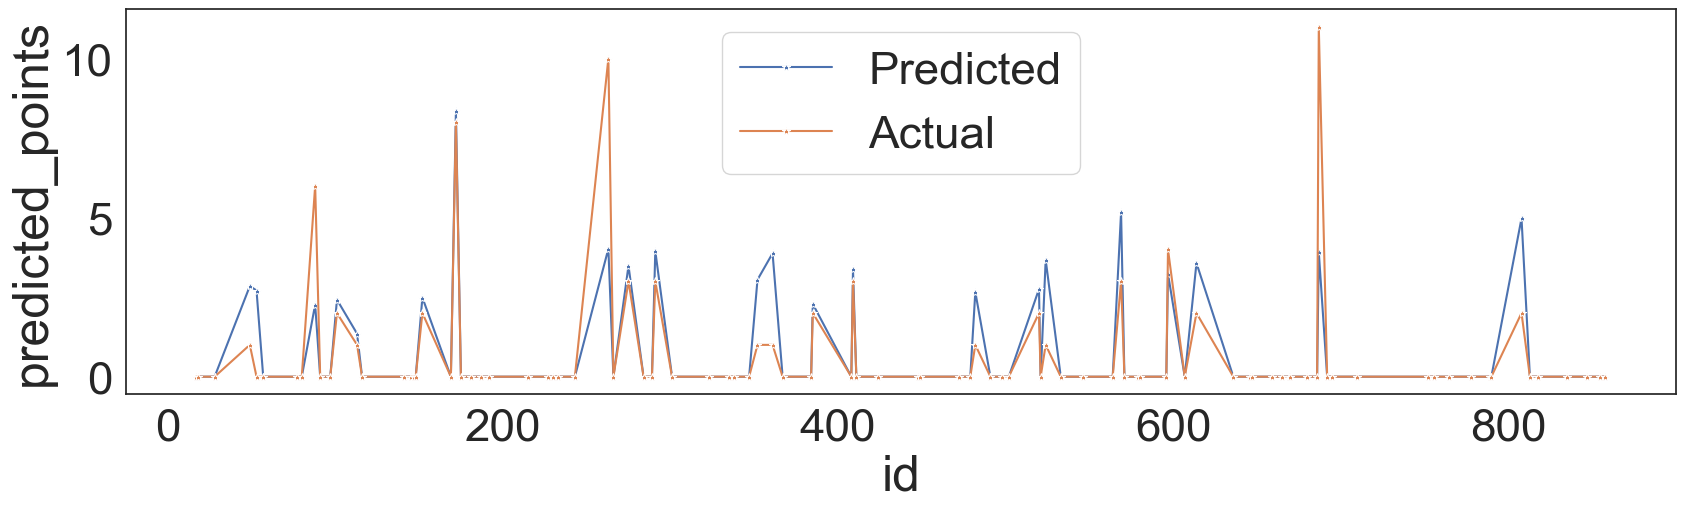

In [426]:
import seaborn as sns
import matplotlib.pyplot as plt

gk_fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=predictions[predictions['position'] == 'gk'],
             x="id", y='predicted_points', label="Predicted", marker="*")
sns.lineplot(data=predictions[predictions['position'] == 'gk'],
             x="id", y='total_points', label="Actual", marker="*")

##### Defenders


c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

<Axes: xlabel='id', ylabel='predicted_points'>

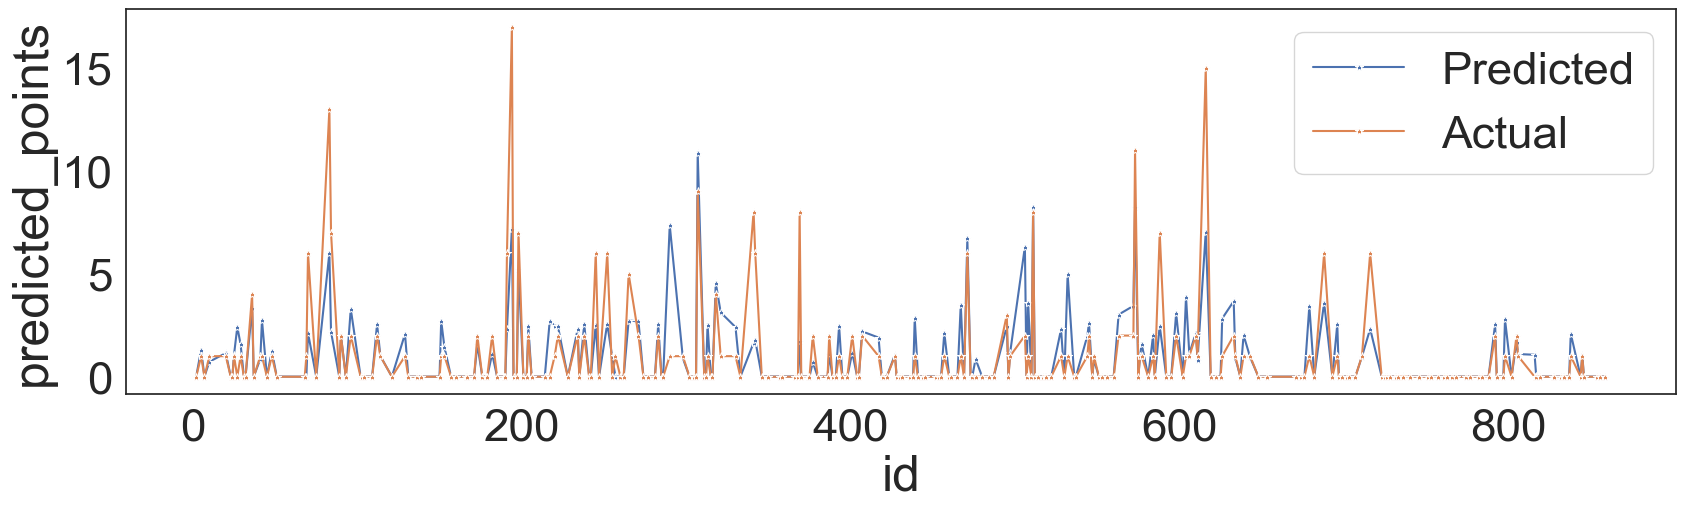

In [427]:

def_fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=predictions[predictions['position'] == 'def'],
             x="id", y='predicted_points', label="Predicted", marker="*")
sns.lineplot(data=predictions[predictions['position'] == 'def'],
             x="id", y='total_points', label="Actual", marker="*")

##### Midfielders


c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

<Axes: xlabel='id', ylabel='predicted_points'>

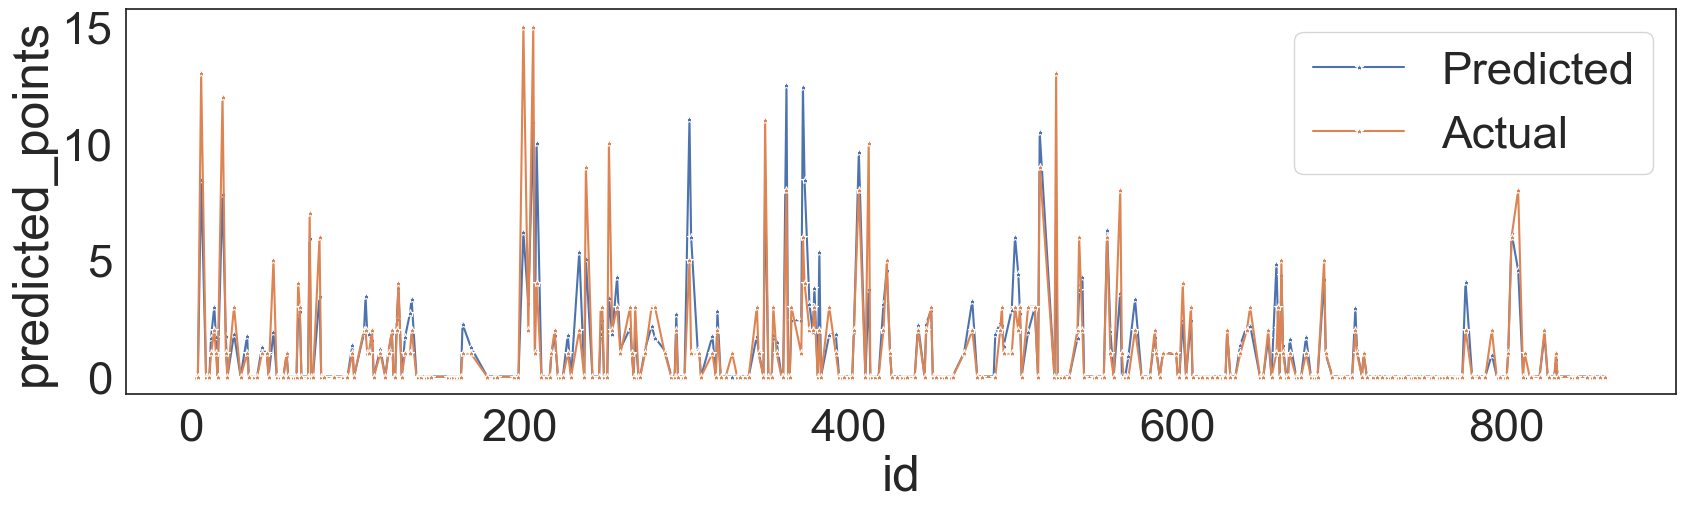

In [428]:

mid_fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=predictions[predictions['position'] == 'mid'],
             x="id", y='predicted_points', label="Predicted", marker="*")
sns.lineplot(data=predictions[predictions['position'] == 'mid'],
             x="id", y='total_points', label="Actual", marker="*")

##### Forwards


c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

<Axes: xlabel='id', ylabel='predicted_points'>

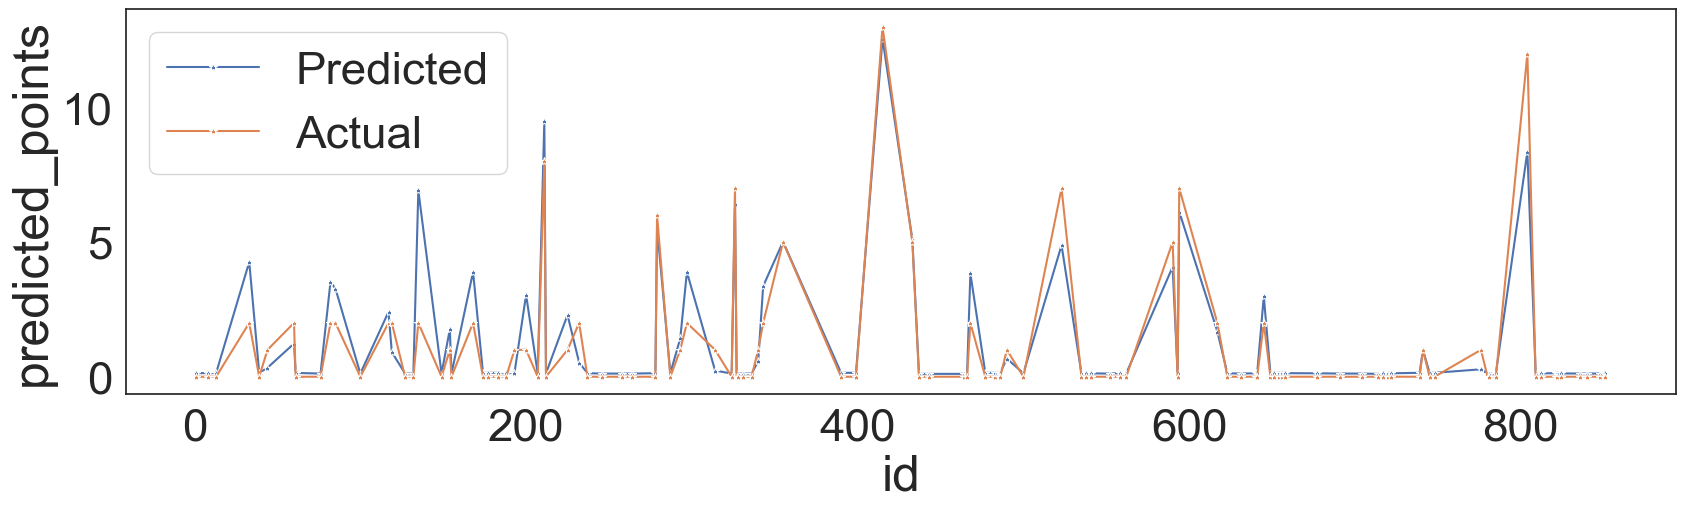

In [429]:

for_fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=predictions[predictions['position'] == 'for'],
             x="id", y='predicted_points', label="Predicted", marker="*")
sns.lineplot(data=predictions[predictions['position'] == 'for'],
             x="id", y='total_points', label="Actual", marker="*")